In [36]:
import pandas as pd
from itertools import islice
import datetime
import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [71]:
# reading in Client with Probe type as Client1
#source = 'data/820Metrotech_test.txt'
source1 = 'data/Kismet-20170421-14-10-27-1.txt'
clients1 = []
with open(source1, 'r') as f:
    for i, client in enumerate(f):
        if 'Client' in client:
            client = client.replace(':',';',1)
            for j in range(i, i+8):
                n = f.next()
                if 'First' in n:
                    F = n
                if 'Last' in n:
                    L = n
                if 'Probe' in n:
                    P = n
                    
                j+= 1
               
            clients1.append(client+';'+F+';'+L +';'+ P)
            #print n

In [73]:
len(clients1)

1878

In [ ]:
# read in client
#source = 'data/820Metrotech_test.txt'

clients = []
with open(source1, 'r') as f:
    for i, client in enumerate(f):
        if 'client' in client:
            client = client.replace(':',';',1)
            for j in range(i, i+3):
                n = f.next()
                if 'First' in n:
                    F = n
                if 'Last' in n:
                    L = n
        
                j+= 1
               
            clients.append(client+';'+F+';'+L)
            #print n

In [100]:
# check multi client records
client2 = []
with open(source1, 'r') as f:
    num = 0
    for i, client in enumerate(f):
        if 'Client 6' in client:
            num += 1
    print num

21


In [101]:
df = pd.DataFrame(columns=['client', 'MAC','first','last', 'type'])

In [102]:
## Add Clients to dataframe
for client in clients1:
    df = df.append(pd.Series(client.split(';'), index=['client','MAC','first','last', 'type']), ignore_index=True)

In [103]:
df.shape

(1878, 5)

In [84]:
df.head(10)

,client,MAC,first,last,type
0,Client 1,MAC 00:00:00:00:00:00\n,First : Fri Apr 21 14:10:31 2017\n,Last : Fri Apr 21 15:10:24 2017\n,Type : Probe Request\n
1,Client 1,MAC 00:03:16:00:9A:2E\n,First : Fri Apr 21 15:05:45 2017\n,Last : Fri Apr 21 15:05:45 2017\n,Type : Probe Request\n
2,Client 1,MAC 00:03:7F:00:00:00\n,First : Fri Apr 21 14:25:03 2017\n,Last : Fri Apr 21 14:25:03 2017\n,Type : Probe Request\n
3,Client 1,MAC 00:04:20:EB:3F:B5\n,First : Fri Apr 21 14:37:45 2017\n,Last : Fri Apr 21 14:47:52 2017\n,Type : Probe Request\n
4,Client 1,MAC 00:06:66:20:62:2E\n,First : Fri Apr 21 15:07:19 2017\n,Last : Fri Apr 21 15:07:19 2017\n,Type : Probe Request\n
5,Client 1,MAC 00:06:66:20:A1:00\n,First : Fri Apr 21 14:47:02 2017\n,Last : Fri Apr 21 14:47:02 2017\n,Type : Probe Request\n
6,Client 1,MAC 00:06:66:22:C5:49\n,First : Fri Apr 21 14:21:59 2017\n,Last : Fri Apr 21 14:22:06 2017\n,Type : Probe Request\n
7,Client 1,MAC 00:06:66:22:CE:43\n,First : Fri Apr 21 14:51:02 2017\n,Last : Fri Apr 21 14:51:02 2017\n,Type : Probe Request\n
8,Client 1,MAC 00:0A:E2:16:A5:A0\n,First : Fri Apr 21 14:10:46 2017\n,Last : Fri Apr 21 15:09:27 2017\n,Type : Probe Request\n
9,Client 1,MAC 00:0E:3B:7A:01:88\n,First : Fri Apr 21 14:31:45 2017\n,Last : Fri Apr 21 14:57:46 2017\n,Type : Probe Request\n


In [108]:
## Clean up MACA Address column
df.MAC = df.MAC.str.replace('MAC ' , '')
df.MAC = df.MAC.str.replace(r'\n','')
df['first'] = df['first'].str.replace(' First      : ' , '')
df['first'] = df['first'].str.replace(r'\n','')
df['last'] = df['last'].str.replace(' Last       : ' , '')
df['last'] = df['last'].str.replace(r'\n','')

In [109]:
def time(row):
    
    week, month, day, time, year = row[3].split(' ')[1:]
    week1, month1, day1, time1, year1 = row[2].split(' ')[1:]
    time = datetime.datetime.strptime(time, '%H:%M:%S')
    time1 = datetime.datetime.strptime(time1, '%H:%M:%S')
    

    return time-time1

In [111]:
df['time_diff'] = df.apply(time, axis = 1)                            

In [112]:
df.MAC.head()

0     00:00:00:00:00:00
1     00:03:16:00:9A:2E
2     00:03:7F:00:00:00
3     00:04:20:EB:3F:B5
4     00:06:66:20:62:2E
Name: MAC, dtype: object

In [11]:
df['last'].head()

0     Fri Apr 21 15:10:24 2017
1     Fri Apr 21 15:05:45 2017
2     Fri Apr 21 14:25:03 2017
3     Fri Apr 21 14:47:52 2017
4     Fri Apr 21 15:07:19 2017
Name: last, dtype: object

In [113]:
num_first = df['first'].unique()
len(num_first)

1280

In [114]:
num_last = df['last'].unique()
# df['last'].value_counts()
len(num_last)

1309

In [115]:
## Get the number of Unique MAC addresses
num_macs = df.MAC.unique()
len(num_macs)

1733

In [116]:
## MAC addresses and the number of times they appear in the log
df.MAC.value_counts()

 44:03:A7:B2:7C:00    7
 6C:20:56:6B:FE:20    6
 44:03:A7:B2:7D:00    5
 64:B0:A6:12:4E:BD    5
 44:03:A7:BA:9D:00    5
 B8:E8:56:C0:06:66    4
 7C:04:D0:74:3E:7E    4
 B0:89:00:90:85:E2    4
 6C:41:6A:F6:2B:00    4
 44:03:A7:F8:3C:00    4
 B8:44:D9:E1:E9:76    4
 64:9A:BE:AD:6F:BF    4
 74:81:14:CC:81:63    4
 EC:1F:72:15:F3:A5    3
 38:48:4C:14:54:C3    3
 5C:AF:06:93:B7:C1    3
 2C:0E:3D:C9:4C:8C    3
 2C:0E:3D:73:1E:EE    3
 60:F4:45:B3:1D:CE    3
 AC:63:BE:20:54:EE    3
 A0:18:28:2D:8F:D9    3
 2C:20:0B:03:F3:2A    3
 60:F1:89:FC:C1:73    3
 D8:1D:72:86:F1:36    3
 64:BC:0C:50:DC:AD    3
 4C:74:BF:98:00:20    3
 78:FD:94:93:F7:FD    3
 D0:25:98:B5:4A:0B    3
 8C:8E:F2:9C:A9:51    3
 DC:85:DE:47:19:E8    2
                     ..
 00:00:0C:9F:F3:48    1
 F8:E4:FB:62:3B:01    1
 DA:A1:19:C0:28:ED    1
 74:8D:08:6F:20:2D    1
 F8:95:C7:A0:C5:E9    1
 66:11:16:77:74:CC    1
 16:D7:05:3D:F7:64    1
 74:3E:2B:28:C5:F8    1
 A0:04:60:CF:A3:A3    1
 DA:A1:19:26:30:60    1
 98:6B:3D:DA:A0:

In [117]:
df[df['first'] != df['last']].shape

(903, 6)

In [118]:
len(df.time_diff.unique())

500

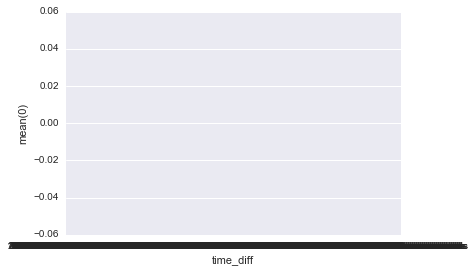

In [119]:
gp = df.groupby('time_diff').size().reset_index()
seaborn.barplot(x = 'time_diff', y = 0, data = gp)

In [149]:
m = gp[0].mean()
import itertools
[m] * 10

[3.756, 3.756, 3.756, 3.756, 3.756, 3.756, 3.756, 3.756, 3.756, 3.756]

In [162]:
gp

,time_diff,0
0,00:00:00,975
1,00:00:01,87
2,00:00:02,7
3,00:00:03,6
4,00:00:04,8
5,00:00:05,13
6,00:00:06,15
7,00:00:07,12
8,00:00:08,4
9,00:00:09,1


'\nplt.subplot(224)\n# filter out time_diff = 0 & time_diff = 1\n# plot out log(counts)\nplt.plot( log(gp[0][2:]))\nplt.xticks([])\n'

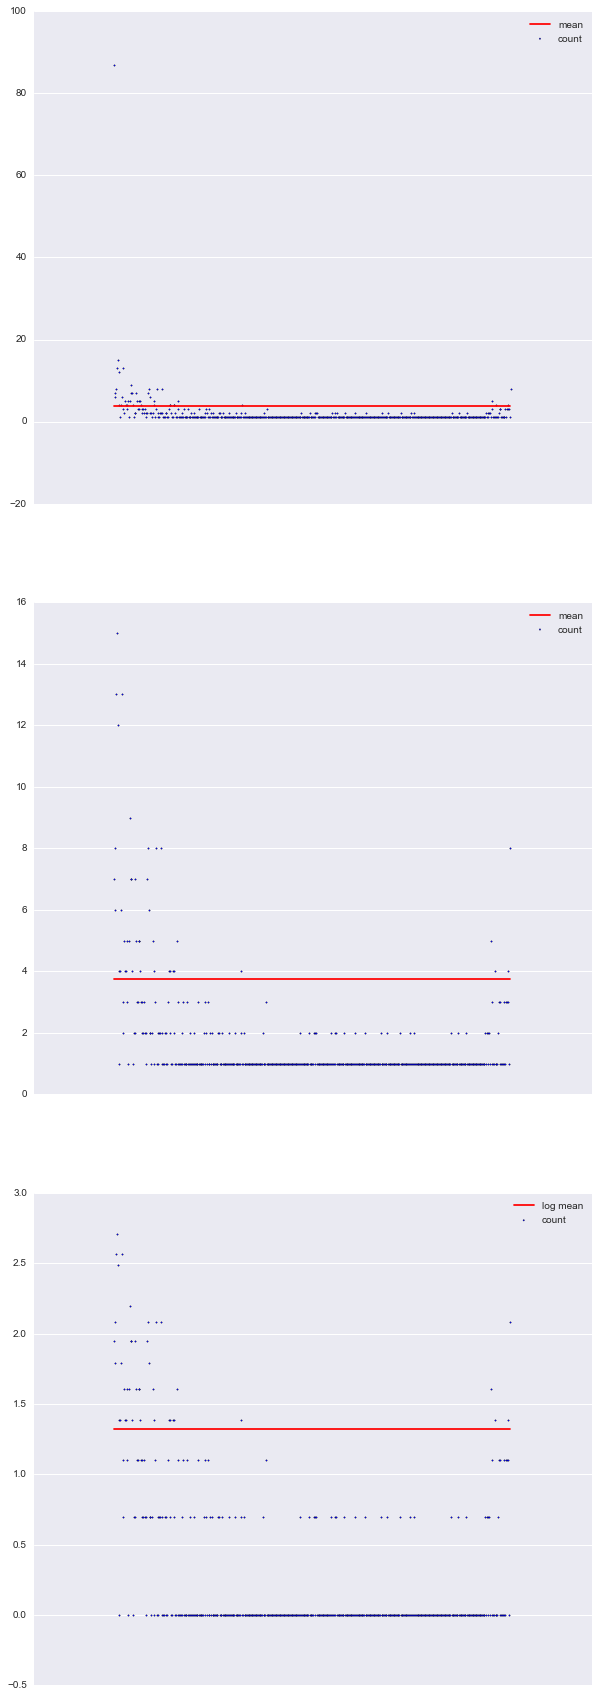

In [171]:
# scatter plot it
import matplotlib.pyplot as plt
plt.figure(figsize=[10,30])


plt.subplot(311)
# filter out time_diff = 0
plt.scatter(range(len(gp)-1), gp[0][1:], s=2, label = 'count')
plt.plot([m] * (len(gp)-2), c = 'r', label = 'mean')
plt.xticks([])
plt.legend()

plt.subplot(312)
# filter out time_diff = 0 & time_diff = 1
plt.scatter(range(len(gp)-2), gp[0][2:], s=2, label = 'count')
plt.plot([m] * (len(gp)-2), c = 'r', label = 'mean')
plt.xticks([])
plt.legend()

plt.subplot(313)
# filter out time_diff = 0 & time_diff = 1
# plot out log(counts)
plt.scatter(range(len(gp)-2), log(gp[0][2:]), s=2, label = 'count')
plt.plot([log(m)] * (len(gp)-2), c = 'r', label = 'log mean')
plt.xticks([])
plt.legend()

'''
plt.subplot(224)
# filter out time_diff = 0 & time_diff = 1
# plot out log(counts)
plt.plot( log(gp[0][2:]))
plt.xticks([])
'''

## filter out multi clients networks 
## make viz nicer 
## Frequency? proxy for distance 
 